# Evaluación Parcial 2 - Análisis Exploratorio de Datos
## Curso: FMY0100 - Fundamentos de Machine Learning  
**Integrantes**: [Andres Calderon]  
**Fecha de entrega**: [08/05/2025]

**FASE 1: Business understanding**

Nuestro OBJETIVO es analizar diferencias en los perfiles de pacientes diabeticos segun grupos de edad para entender como varia el riesgo con la edad.

- ¿En que nos puede ayudar este objetivo?
1. Nos ayudara a diseñar intervenciones especificas por edad, por ejemplo si los adultos de 40 - 50 años tienen los niveles de glucosa mas altos, podemos recomendar campañas dirigidas esencialmente a ese rango.

2. Priorizacion de recursos de salud, en lugar de tratar a toda la poblacion por igual, podemos enfocar los esfuerzos y presupuestos en los grupos que muestran mayor riesgo.

**FASE 2: Data Understanding**

In [8]:
#Importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Una vez importadas las librerias empezaremos el analisis exploratorio


---



In [9]:
#empezaremos cargando nuestro Dataset
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [10]:
#esta linea es para que lea el dataframe y el codigo funcione correctamente, si esta linea no se ejecuta ningun otro codigo funcionara
dbt = pd.read_csv('diabetes.csv')

**Hagamos un analisis exploratorio**
Vayamos de menos a mas





Veamos cuantas columnas y filas tenemos

In [11]:
dbt.shape

(768, 9)

Ahora tengamos una vista general de los datos

In [45]:
dbt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,Adulto
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,Adulto
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,Adulto
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,joven
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Adulto


In [46]:
#para tener una vision general de los datos y que tipos de datos son.
dbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   AgeGroup                  768 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


En el dataset solo tenemos datos estructurados, sin embargo solo tenemos valores numericos, asi que de alguna manera hay que "ordenarlos", sin embargo hay que tener en consideracion que nuestro  dato objetivo es "Outcome"


**Tipos de variables**

valores *numericos* **Discretos y continuos**, *categoricos* **BINARIOS**:

In [16]:
#Clasificacion de variables
clasificacion_variables = {}
for col in dbt.columns:
    if col == "Pregnancies" or col == "Age":
        clasificacion_variables[col] = "Discreto"
    elif col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]:
        clasificacion_variables[col] = "Continuo"
    else :
        clasificacion_variables[col] = "Binario"


clasificacion_variables = pd.DataFrame(list(clasificacion_variables.items()), columns=['Columna', 'Tipo'])
clasificacion_variables

,Columna,Tipo
0,Pregnancies,Discreto
1,Glucose,Continuo
2,BloodPressure,Continuo
3,SkinThickness,Continuo
4,Insulin,Continuo
5,BMI,Continuo
6,DiabetesPedigreeFunction,Continuo
7,Age,Discreto
8,Outcome,Binario


**Estadistica descriptiva**
ahora si empezamos con algo mas complejo

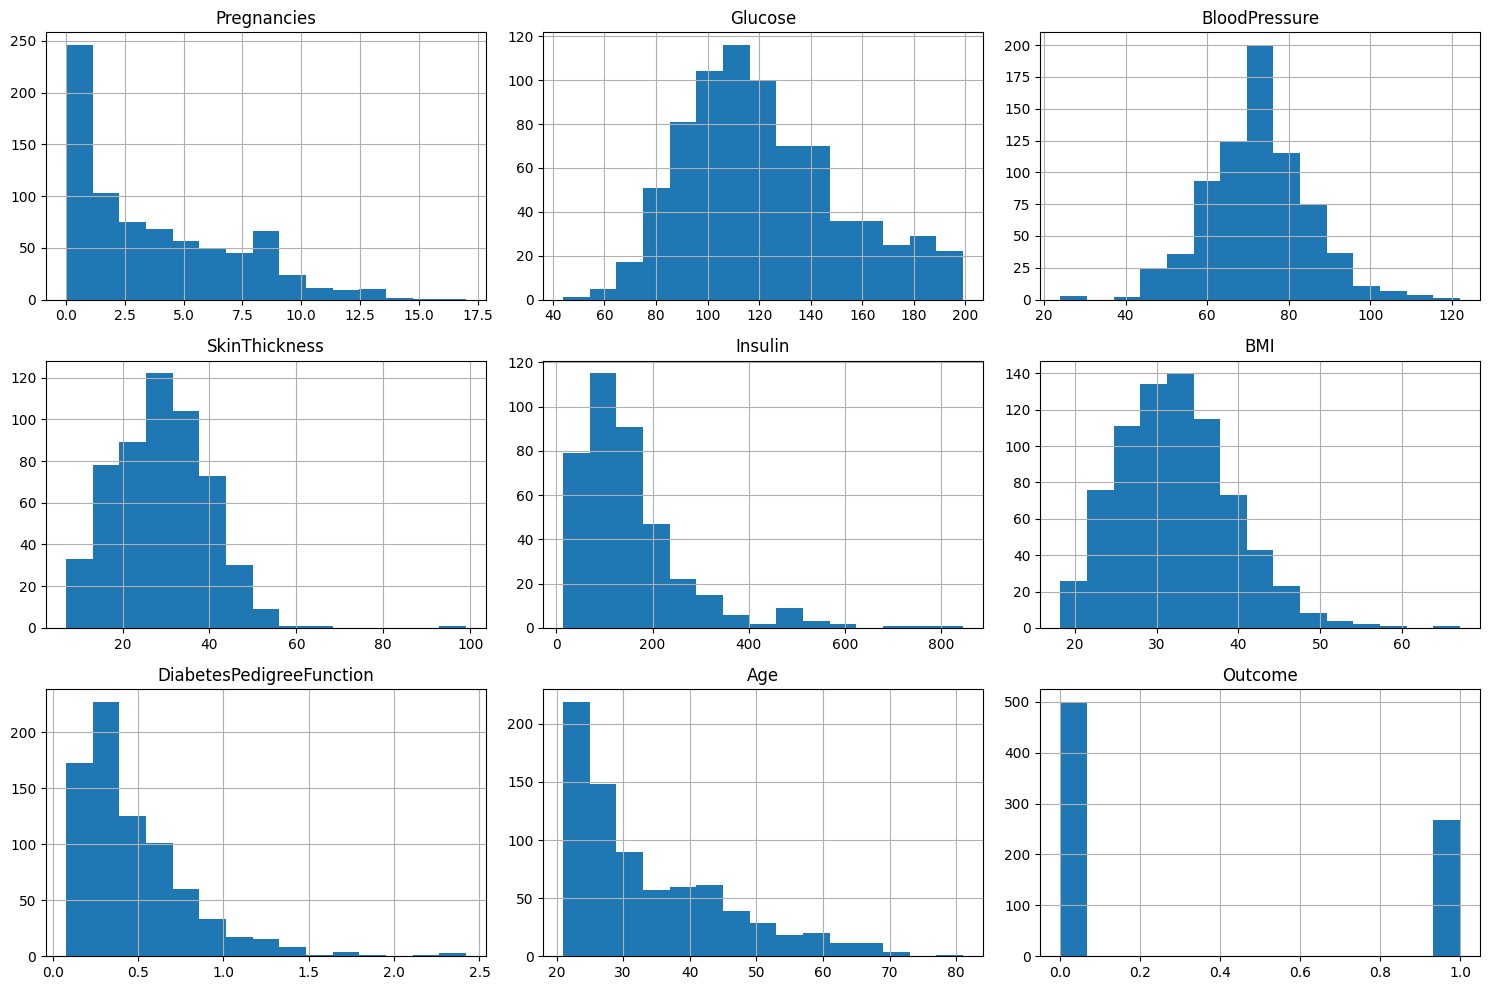

In [32]:
#visualizacion de desviacion estandar de las columnas del dataset
dbt.hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()

Lo siguiente corresponde a la comparaciond de Glucosa, Presion de la sangre, BMI, Insulina y Grosor de la piel con Outcome segun el grupo de edad.

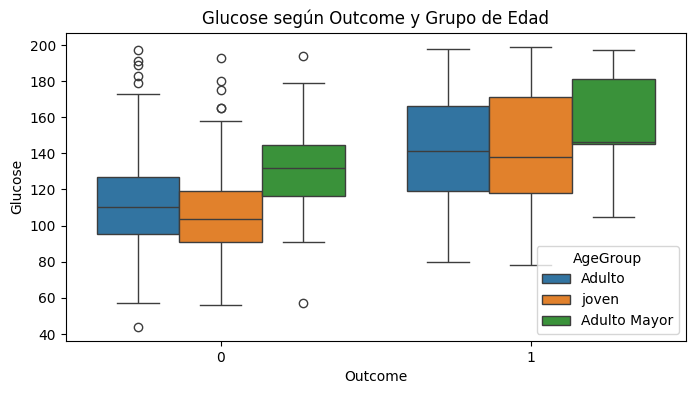

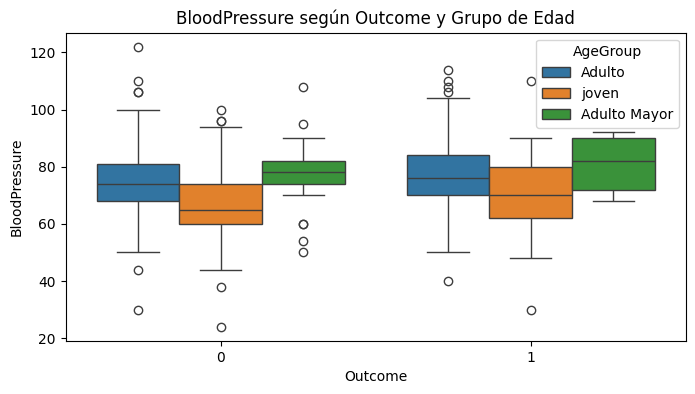

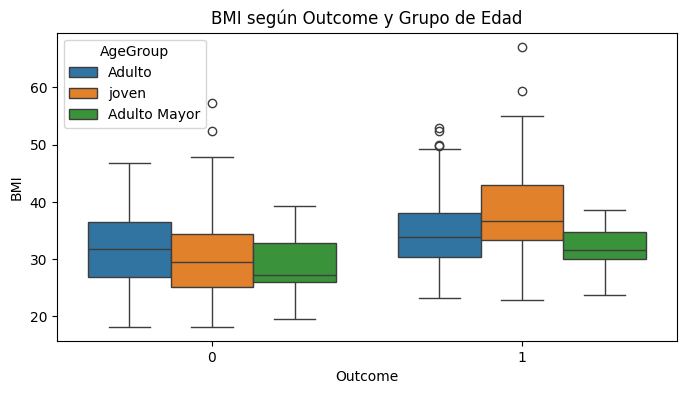

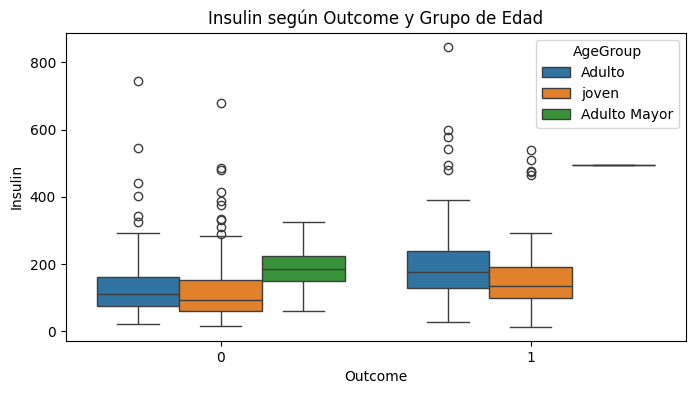

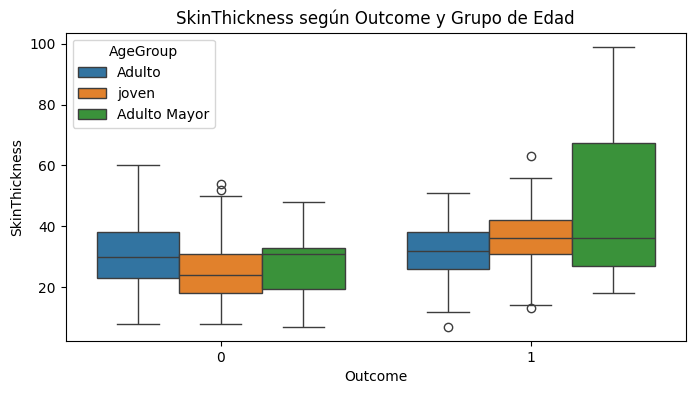

In [48]:
variables = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']

dbt['AgeGroup'] = dbt['Age'].apply(
    lambda age: 'joven' if age >= 18 and age <= 26
    else ('Adulto' if age >= 27 and age <= 59
    else 'Adulto Mayor')
)

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=var, hue='AgeGroup', data=dbt)
    plt.title(f'{var} según Outcome y Grupo de Edad')
    plt.show()

Lo que se hizo fue al dataset agregarle otra columna, esto lo hice unicamente por comodidad, ya que de esta forma podemos graficar de mejor manera y mas ordenado, no siempre es necesaria usar la columna AgeGroup, ya que es mas preciso usar Age, unicamente fue por comodidad

<Axes: xlabel='Outcome', ylabel='Age'>

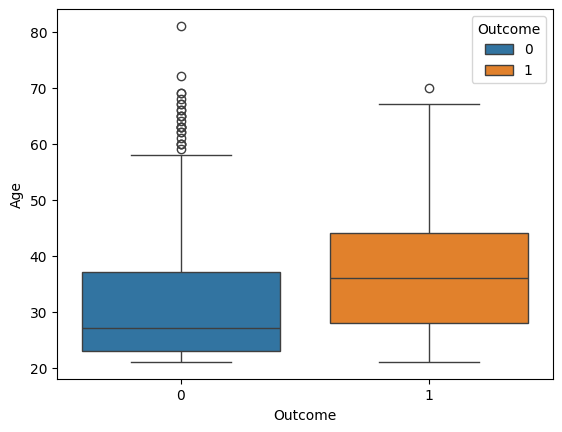

In [57]:
#Boxplot de outcome y age
diabetes = [dbt]
boxplot(x="Outcome", y="Age", hue="Outcome", data=dbt)

Datos estadisticos:

In [17]:
#Datos estadisticos
estadisticas = {
    'Media': dbt.mean(),
    'Mediana': dbt.median(),
    'Desviación estándar': dbt.std(),
    'Mínimo': dbt.min(),
    'Máximo': dbt.max()
}
pd.DataFrame(estadisticas)

,Media,Mediana,Desviación estándar,Mínimo,Máximo
Pregnancies,3.845052,3.0000,3.369578,0.000,17.00
Glucose,120.894531,117.0000,31.972618,0.000,199.00
BloodPressure,69.105469,72.0000,19.355807,0.000,122.00
SkinThickness,20.536458,23.0000,15.952218,0.000,99.00
Insulin,79.799479,30.5000,115.244002,0.000,846.00
BMI,31.992578,32.0000,7.884160,0.000,67.10
DiabetesPedigreeFunction,0.471876,0.3725,0.331329,0.078,2.42
Age,33.240885,29.0000,11.760232,21.000,81.00
Outcome,0.348958,0.0000,0.476951,0.000,1.00


**MAPA DE CORRELACIONES**

Con este mapa podremos identificar de mejor manera los factores de riesgo y priorizar cuales son las variables usar en el modelado

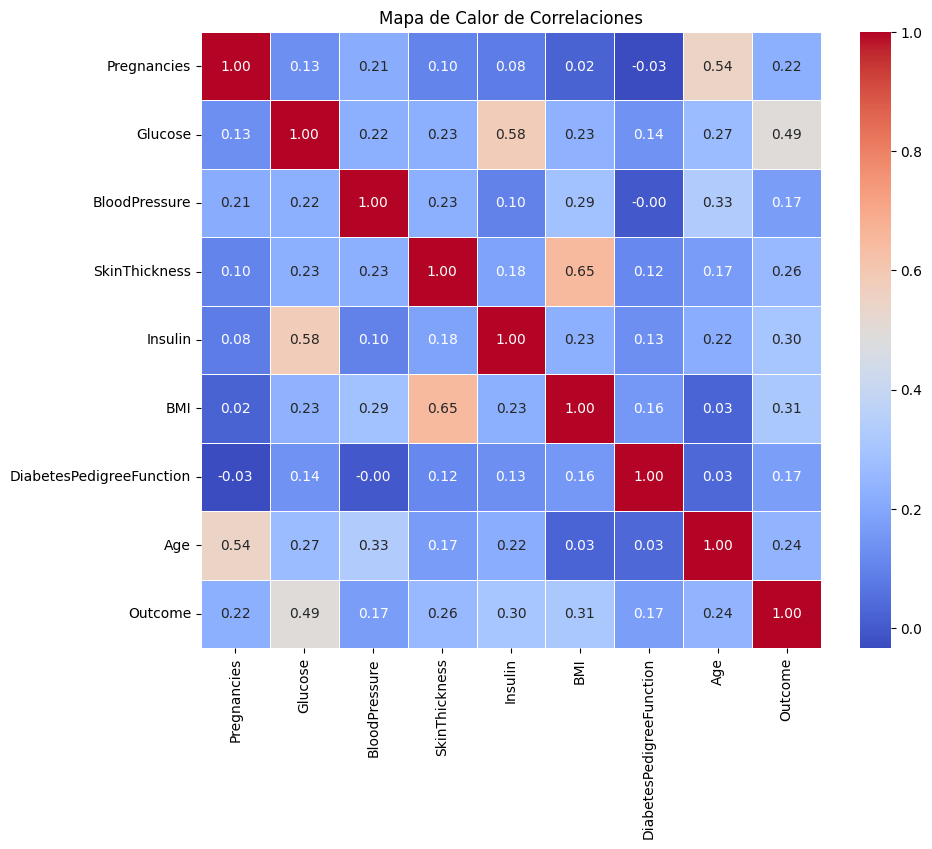

In [53]:
columnas_numericas = dbt.select_dtypes(include=['number'])

correlacion = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


**FASE 3: DATA PREPARATION**

veamos si hay valores null o algun que otro 0 que sea sospechoso

In [27]:
revision_columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

contador_ceros = {col: (dbt[col] == 0).sum() for col in revision_columnas}
contador_ceros

{'Glucose': np.int64(0),
 'BloodPressure': np.int64(0),
 'SkinThickness': np.int64(0),
 'Insulin': np.int64(0),
 'BMI': np.int64(0)}

Observaciones:
no hay valores nulos PERO, Glucose, BloodPressure, SkinThickness, Insulin, BMI tienen valores mínimos = 0, probablemente sean datos faltantes que se incluyeron como un 0. esos 0 los reemplazaremos por NaN



Reemplazaremos los valores 0 en las columnas Glucose, BloodPressure, SkinThickness, Insulin y BMI por NaN

In [30]:
for col in revision_columnas:
    dbt[col] = dbt[col].replace(0, np.nan)

revision_columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

contador_nulos = {col: dbt[col].isna().sum() for col in revision_columnas}
contador_nulos

{'Glucose': np.int64(5),
 'BloodPressure': np.int64(35),
 'SkinThickness': np.int64(227),
 'Insulin': np.int64(374),
 'BMI': np.int64(11)}

**RECORDATORIO**
hemos agregado una columna categorica al dataset "AgeGroup", si planeamos en un futuro seguir usando esta variable en la fase de modelado, hay que ejecutar el siguiente codigo, **PERO** si no planeamos usarla **NO** es necesario. Aun asi hay que ver cuales podrian ser nuestras necesidades segun sean requeridas.

In [ ]:
dbt['AgeGroup_code'] = dbt['AgeGroup'].map({
    'Joven': 0,
    'Adulto': 1,
    'Adulto Mayor': 2
})

lo que hace esta linea de codigo, convierte el texto a numero
JOVEN: 0,
ADULTO: 1,
ADULTO MAYOR: 2

Separamos nuestras variables TARGET y FEATURES.

In [55]:
X = dbt.drop(columns=['Outcome', 'Age'])
y = dbt['Outcome']